In [1]:
import math

def get_data_from_file(filename):
    instances = []
    fin = open(filename, "r")

    for line in fin:
        instances.append(line.strip().split(","))

    fin.close()

    return instances

In [2]:
car_data = get_data_from_file("car.data")
print(car_data[:10], '\n')

[['vhigh', 'vhigh', '2', '2', 'small', 'low', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'small', 'med', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'small', 'high', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'med', 'low', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'med', 'med', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'med', 'high', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'big', 'low', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'big', 'med', 'unacc'], ['vhigh', 'vhigh', '2', '2', 'big', 'high', 'unacc'], ['vhigh', 'vhigh', '2', '4', 'small', 'low', 'unacc']] 



In [3]:
#method to get feature names from attributes file
def get_features(filename):
    feat_list = []
    fin = open(filename, "r")

    for line in fin:
        attrib = line.strip().split(':')
        feat_list.append(attrib[0])

    return feat_list

In [4]:
feat_names = get_features("car.c45-names")
print(feat_names)

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label']


In [5]:
# Create a function to open attributes file
# Return list of attribute values, along with attrib name

def get_attribs_from_file(filename):
    attribs = []
    fin = open(filename,"r")
    
    for line in fin:
        words = line.strip().split()
        attribs.append(words[1:])
        
    return attribs

In [6]:
# Print attrib info
car_attribs = get_attribs_from_file("car.c45-names")
print(car_attribs)

[['vhigh', 'high', 'med', 'low'], ['vhigh', 'high', 'med', 'low'], ['2', '3', '4', '5', 'more'], ['2', '4', 'more'], ['small', 'med', 'big'], ['low', 'med', 'high'], ['unacc', 'acc', 'good', 'vgood']]


In [7]:
cutoff =  math.ceil(len(car_data) * .66) #2/3 | 1/3 split
training_set = car_data[:cutoff] #2/3 for training
test_set = car_data[cutoff:] #1/3 for testing

print(len(training_set))
print(len(test_set))
print(training_set[1])

1141
587
['vhigh', 'vhigh', '2', '2', 'small', 'med', 'unacc']


In [8]:
#break up training instances into features (X) and label (Y)
X_train = [training_set[i][:len(training_set[i])-2] for i in range(len(training_set))]
Y_train = [(training_set[i][len(training_set[i])-1]) for i in range(len(training_set))]
print(X_train[0])
print(feat_names)
print(Y_train[0])

['vhigh', 'vhigh', '2', '2', 'small']
['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label']
unacc


In [9]:
X_test = [test_set[i][:len(test_set[i])-2] for i in range(len(test_set))]
Y_test = [(training_set[i][len(training_set[i])-1]) for i in range(len(training_set))]
print(X_test[0])
print(feat_names[1:])
print(Y_test[0])

['med', 'med', '4', '2', 'big']
['maint', 'doors', 'persons', 'lug_boot', 'safety', 'label']
unacc


In [10]:
def get_entropy(instances, class1, class2, class3, class4):
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    # HINT: Get counts for both classes
    for x in instances:
        # print(x[len(x)-1])  
        if(x[len(x)-1] == class1):
            count1 += 1
        elif(x[len(x)-1] == class2): 
            count2 += 1
        elif(x[len(x)-1] == class3):
            count3 += 1
        elif(x[len(x)-1] == class4):
            count4 += 1
    
    # HINT: Get class count for both classes
    ent1 = 0
    ent2 = 0
    ent3 = 0
    ent4 = 0
    total = len(instances)
    if(total != 0):
            ent1 = count1/total
            ent2 = count2/total
            ent3 = count3/total
            ent4 = count4/total    
    # HINT: Be careful! Remember that log(0) is undefined (regardless of the log's base)
    if ent1 == 0 or ent2 == 0 or ent3 == 0 or ent4 == 0:
        ent = 0
    else:
        ent = - ent1 * math.log2(ent1) - ent2 * math.log2(ent2) - ent3 * math.log2(ent3) - ent4 * math.log2(ent4)
    return ent

In [11]:
all_entropy = get_entropy(test_set,'unacc','acc','good','vgood')
print(all_entropy)

1.6130579300605077


In [12]:
def get_cond_entropy(instances, feat_index, feat_vals, class1, class2, class3, class4):
    num_inst = len(instances)
    total_entropy = 0.0
    # HINT: Iterate over all feat_vals (i.e., all values the current feature--feat_index--can take on).
    for feat_val in feat_vals:
        subset = []
        for instance in instances:
            if instance[feat_index] == feat_val:
                subset.append(instance)

    # HINT: Calculate probability of attribute taking on this value.
    prob_feat = len(subset) / num_inst
    
    subset_entropy = get_entropy(subset, class1, class2,class3,class4)

    if subset_entropy is not None:
        calc = prob_feat * subset_entropy
        total_entropy += calc

    return total_entropy


In [13]:
for i in range(len(car_attribs)-1):
    print(i)
    get_cond_entropy(test_set, i, car_attribs[i],'unacc', 'acc', 'good', 'vgood')

0
1
2
3
4
5


In [14]:
def get_info_gain(instances, feat_index, feat_vals, class1, class2, class3, class4):
   # HINT: you should be able to just call your entropy and conditional entropy
    #         functions you've already coded.    info_gain = 0
    entropy = get_entropy(instances, 'unacc', 'acc', 'good', 'vgood')
    cond_entropy = get_cond_entropy(instances, feat_index,feat_vals,class1,class2,class3,class4)
    
    if entropy is not None:
        info_gain = entropy - cond_entropy
    
    return info_gain


In [15]:
def test(instances, feat_index, feat_vals):
    for feat_val in feat_vals:
        subset = []
        for instance in instances:
            if instance[feat_index] == feat_val:
                subset.append(instance)


In [16]:
for i in range(len(car_attribs)-1):
    test(test_set, i, car_attribs[i])

In [17]:
all_IGs = []
c1,c2,c3,c4 = car_attribs[len(car_attribs)-1]
print("c1,c2,c3,c4: ", c1,c2,c3,c4)  # Two class values

for i in range(len(car_attribs)-1):
    all_IGs.append(get_info_gain(test_set, i, car_attribs[i],c1,c2,c3,c4))

c1,c2,c3,c4:  unacc acc good vgood


In [18]:
print(all_IGs)

[0.456908088211855, 1.0168032223410894, 1.6130579300605077, 0.9745339553516572, 1.045681815673153, 0.9714480258086349]


In [17]:
def get_inst_features_from_file(filename):
    instances = []
    fin = open(filename, "r")

    for line in fin:
        inst = []
        data = line.strip().split(",")
        if data[0] == "vhigh":
            inst.append(0)
        elif data[0] == "high":
            inst.append(1)
        elif data[0] == "med":
            inst.append(2)
        elif data[0] == "low":
            inst.append(3)
        if data[1] == "vhigh":
            inst.append(0)
        elif data[1] == "high":
            inst.append(1)
        elif data[1] == "med":
            inst.append(2)
        elif data[1] == "low":
            inst.append(3)
        if data[2] == "5more":
            inst.append(6)
        else:
            inst.append(int(data[2]))
        if data[3] == "more":
            inst.append(5)
        else:
            inst.append(int(data[3]))
        if data[4] == "small":
            inst.append(0)
        elif data[4] == "med":
            inst.append(1)
        elif data[4] == "big":
            inst.append(2)
        if data[5] == "low":
            inst.append(0)
        elif data[5] == "med":
            inst.append(1)
        elif data[5] == "high":
            inst.append(2)
        instances.append(inst)

    fin.close()

    return instances

def get_inst_labels_from_file(filename):
    labels = []
    fin = open(filename, "r")

    for line in fin:
        data = line.strip().split(",")
        labels.append(data[6])

    fin.close()

    return labels

inst = get_inst_features_from_file("car.data")
label = get_inst_labels_from_file("car.data")
print(inst[1])
print(label[1])

[0, 0, 2, 2, 0, 1]
unacc


[Text(0.2692307692307692, 0.9166666666666666, 'x[5] <= 0.5\nentropy = 1.206\nsamples = 1728\nvalue = [384, 69, 1210, 65]'),
 Text(0.19230769230769232, 0.75, 'entropy = 0.0\nsamples = 576\nvalue = [0, 0, 576, 0]'),
 Text(0.34615384615384615, 0.75, 'x[3] <= 3.0\nentropy = 1.48\nsamples = 1152\nvalue = [384, 69, 634, 65]'),
 Text(0.2692307692307692, 0.5833333333333334, 'entropy = 0.0\nsamples = 384\nvalue = [0, 0, 384, 0]'),
 Text(0.4230769230769231, 0.5833333333333334, 'x[0] <= 1.5\nentropy = 1.641\nsamples = 768\nvalue = [384, 69, 250, 65]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[1] <= 0.5\nentropy = 0.997\nsamples = 384\nvalue = [180, 0, 204, 0]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96, 0]'),
 Text(0.23076923076923078, 0.25, 'x[4] <= 0.5\nentropy = 0.954\nsamples = 288\nvalue = [180, 0, 108, 0]'),
 Text(0.15384615384615385, 0.08333333333333333, 'entropy = 0.946\nsamples = 96\nvalue = [35, 0, 61, 0]'),
 Text(0.3076923076923077, 0.08

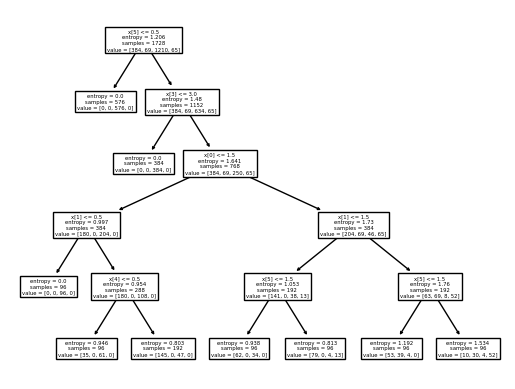

In [26]:
import sklearn
import matplotlib
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(inst, label)
tree.plot_tree(clf)

# iris = load_iris()
# print(iris.data[2])
# print(iris.target[2])